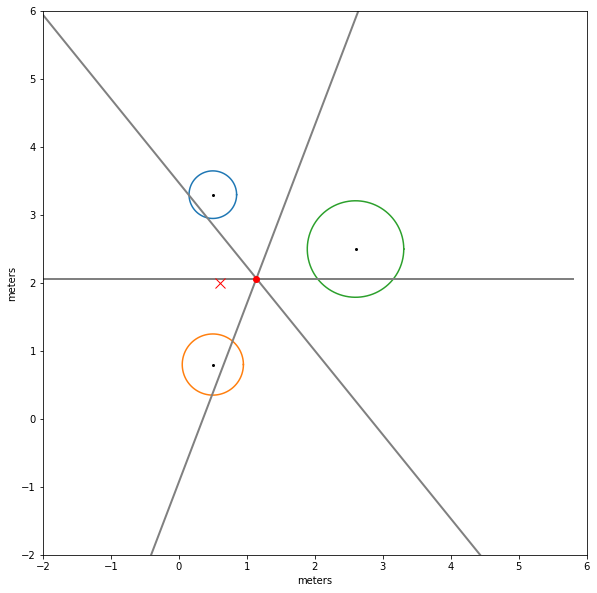

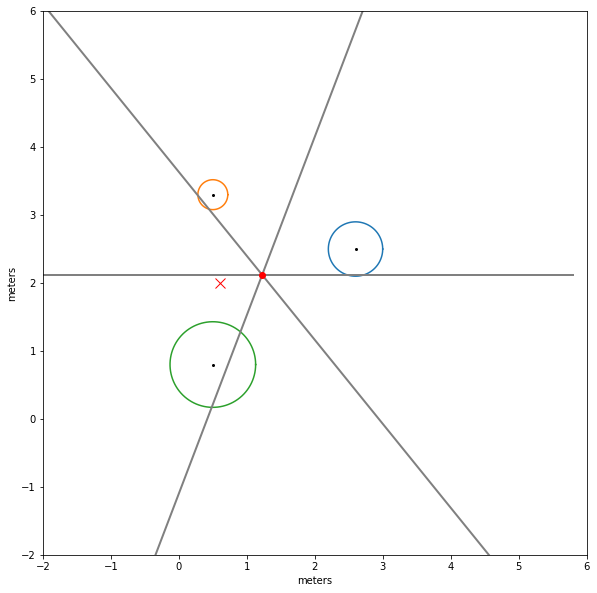

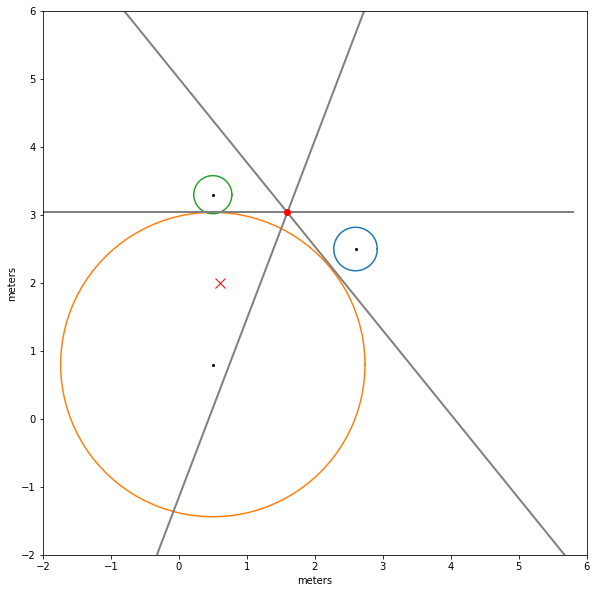

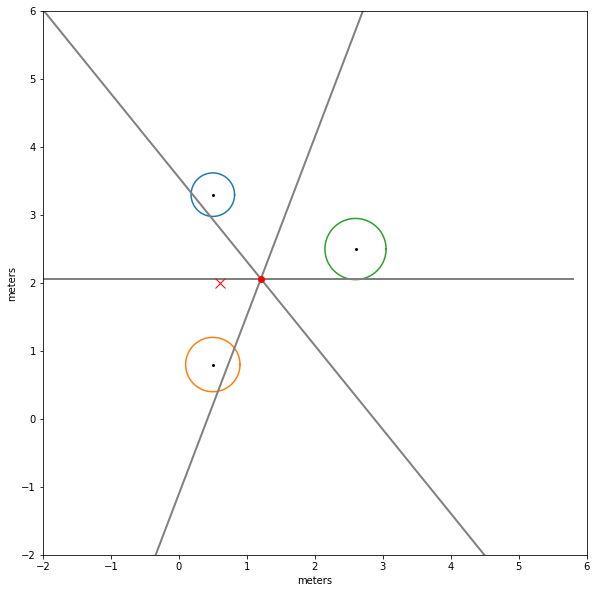

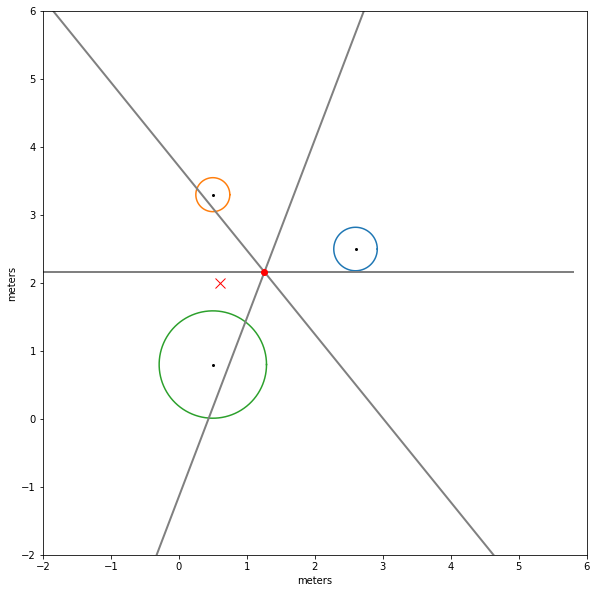

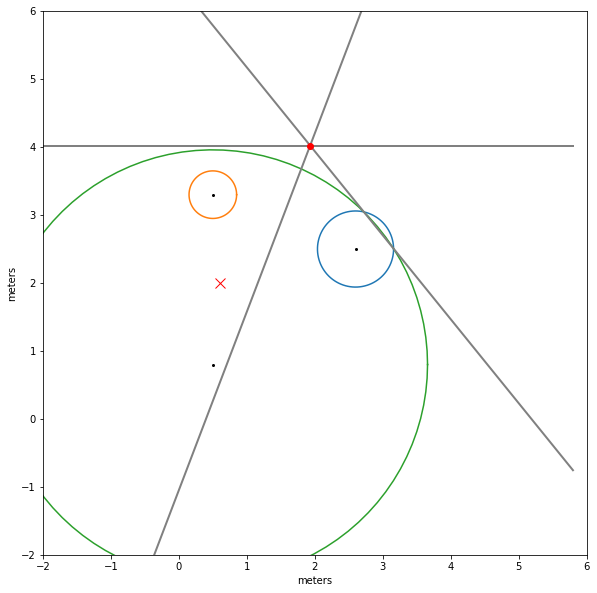

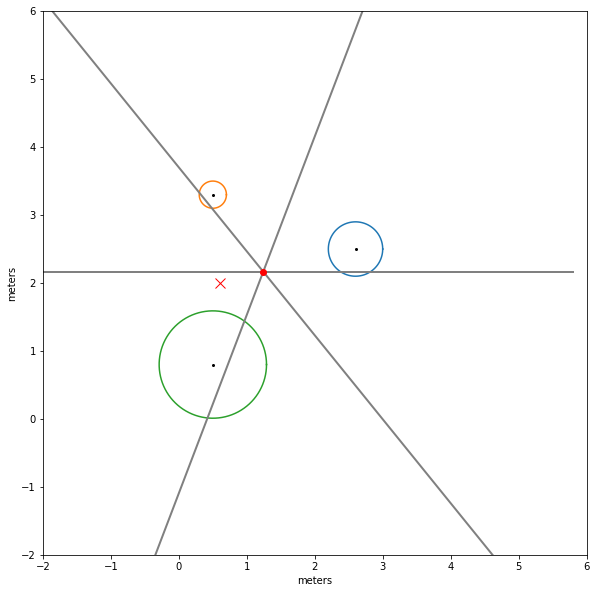

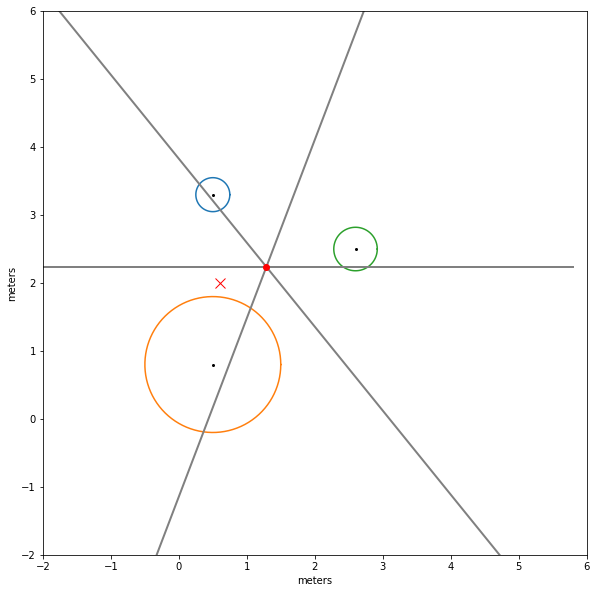

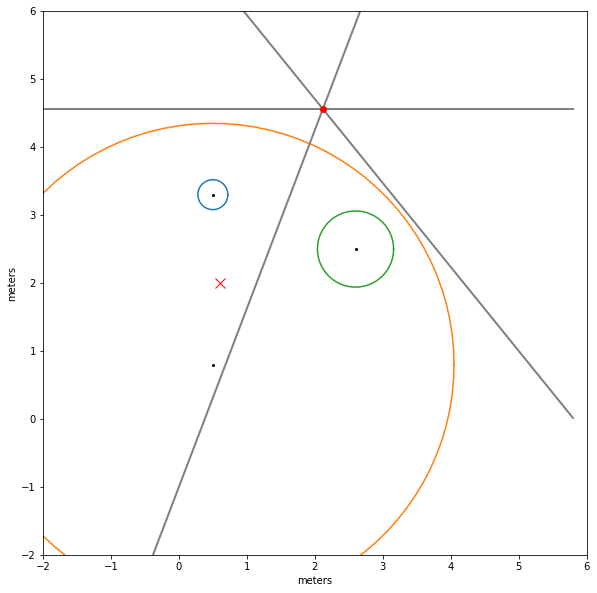

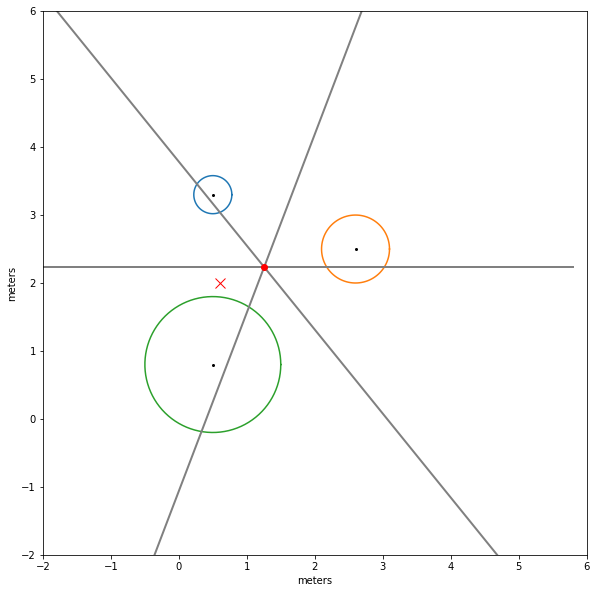

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

path = "10-03-2020/"

files = glob("log/" + path + "*.npy")

real_point = [0.6, 2.0]

for idx, file in enumerate(files):
    inp = np.load(file, allow_pickle=True)
    lines = inp[0]
    circ = inp[1]
    point = inp[2]

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    plt.xlim(-2,6)
    plt.ylim(-2,6)
    plt.xlabel("meters")
    plt.ylabel("meters")
    ax.set_aspect(1)

    xrange = np.arange(-2,6,0.2)

    for ci, c in enumerate(circ):
        theta = np.linspace(0, 2*np.pi, 100)

        r = np.sqrt((c[0]/2)**2+(c[1]/2)**2-c[2])
        
        x1 = -c[0]/2+r*np.cos(theta)
        x2 = -c[1]/2+r*np.sin(theta)
        
        plt.plot(-c[0]/2,-c[1]/2, marker='o', markersize=2, color="black")
        ax.plot(x1, x2)

    for line in lines:
        line_eqn = lambda x : -(line[0]/line[1])*x -line[2]/line[1]
        plt.plot(xrange, [ line_eqn(x) for x in xrange], color='grey', linestyle='-', linewidth=2)

    plt.plot(point[0], point[1], marker='o', markersize=6, color="red")
    plt.plot(real_point[0], real_point[1], marker='x', markersize=10, color="red")

#     path = str(file[:-4])
#     fig.savefig("img/" + path,dpi=fig.dpi)
    fig.savefig("img/" + path + str(idx),dpi=fig.dpi)
    

In [16]:
import pandas as pd
import numpy as np

import re

from glob import glob
from math import sqrt

files = glob("log/10-03-2020/*.npy")

real_point = [0.5, 2.0]

for idx, file in enumerate(files):
    inp = np.load(file, allow_pickle=True)
    lines = inp[0]
    circ = inp[1]
    point = inp[2]
    
#     latex = open("files/"+file[:-4]+".tex",'w+')
    latex = open("tex/"+str(idx)+".tex",'w+')
    
    data_circ = {'X': [round(-c[0]/2,2) for c in circ], 'Y': [round(-c[1]/2,2) for c in circ], 'Raggio': [round(np.sqrt((c[0]/2)**2+(c[1]/2)**2-c[2]),2) for c in circ]}
    df_circ = pd.DataFrame(data_circ, index=['CIRCONFERENZA 1','CIRCONFERENZA 2','CIRCONFERENZA 3'])
    
    data_line = {'a': [round(l[0],2) for l in lines], 'b': [round(l[1],2) for l in lines], 'c': [round(l[2],2) for l in lines]}
    df_line = pd.DataFrame(data_line, index=['RETTA 1','RETTA 2','RETTA 3']) 
    
    data_point = {'X': [real_point[0], round(point[0],2)], 'Y': [real_point[1], round(point[1],2)]}
    df_point = pd.DataFrame(data_point, index=['PUNTO REALE', 'PUNTO STIMATO'])
    
    deltaX = round(point[0] - real_point[0], 2)
    deltaY = round(point[1] - real_point[1], 2) 

    data_delta = {'X': deltaX, 'Y': deltaY}
    df_delta = pd.DataFrame(data_delta, index=['DELTA'])

    data = "\\begin{center}\n" + re.sub(r'[a-z]*rule','hline',df_circ.to_latex()) + "\hspace{10mm}" + re.sub(r'[a-z]*rule','hline',df_line.to_latex()) + \
            "\end{center}\n\\vspace{4mm}\n\\begin{center}\n" + re.sub(r'[a-z]*rule','hline',df_point.to_latex()) + "\hspace{25mm}" + \
            re.sub(r'[a-z]*rule','hline',df_delta.to_latex()) + "\end{center}"

    latex.write(re.sub(r'lr+','|c|c|c|c|',data))
    latex.close()
#     latex.write(re.sub(r'[a-z]*rule','hline',df_circ.to_latex()))
#     latex.write("\n\\newline\n")
#     latex.write(re.sub(r'[a-z]*rule','hline',df_line.to_latex()))
#     latex.write("\n\\newline\n")
#     latex.write(re.sub(r'[a-z]*rule','hline',df_point.to_latex()))
#     latex.write("\n\\newline\n")
#     latex.write(re.sub(r'[a-z]*rule','hline',df_delta.to_latex()))
    